In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

In [27]:
dataset = pd.read_csv("ReplicatedAcousticFeatures-ParkinsonDatabase.csv")

In [28]:
dataset.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [29]:
dataset.shape

(240, 48)

In [30]:
dataset['ID']

0      CONT-01
1      CONT-01
2      CONT-01
3      CONT-02
4      CONT-02
        ...   
235    PARK-39
236    PARK-39
237    PARK-40
238    PARK-40
239    PARK-40
Name: ID, Length: 240, dtype: object

In [31]:
label_enc = LabelEncoder()
dataset['ID'] = label_enc.fit_transform(dataset['ID'])

In [32]:
dataset['ID']

0       0
1       0
2       0
3       1
4       1
       ..
235    78
236    78
237    79
238    79
239    79
Name: ID, Length: 240, dtype: int32

In [33]:
X = dataset.drop("Jitter_rel", axis=1)
y = dataset['Jitter_rel']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [35]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_predict = regressor.predict(X_test)


In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
199,0.22349,0.19231
90,0.64068,0.60982
89,0.92908,0.78955
91,0.37186,0.40728
68,0.39241,0.38446
209,0.68101,0.72823
70,0.31236,0.29976
69,0.20069,0.19979
203,1.09900,0.98373
232,0.27423,0.25677


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04397812499999998
Mean Squared Error: 0.003256670914583331
Root Mean Squared Error: 0.05706724905393049


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        21

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Accuracy: 100.0


[Text(232.47494612068965, 211.04470588235293, 'X[4] <= 0.0\nmse = 0.34\nsamples = 192\nvalue = 0.598'),
 Text(231.03184267241377, 198.25411764705882, 'X[6] <= 0.005\nmse = 0.137\nsamples = 191\nvalue = 0.565'),
 Text(147.60242456896552, 185.4635294117647, 'X[6] <= 0.002\nmse = 0.033\nsamples = 156\nvalue = 0.427'),
 Text(86.36072198275862, 172.6729411764706, 'X[6] <= 0.002\nmse = 0.006\nsamples = 82\nvalue = 0.28'),
 Text(50.59881465517241, 159.88235294117646, 'X[4] <= 0.0\nmse = 0.002\nsamples = 59\nvalue = 0.238'),
 Text(22.007327586206895, 147.09176470588235, 'X[6] <= 0.001\nmse = 0.001\nsamples = 25\nvalue = 0.2'),
 Text(9.380172413793103, 134.30117647058825, 'X[17] <= 0.258\nmse = 0.0\nsamples = 7\nvalue = 0.167'),
 Text(5.772413793103448, 121.51058823529411, 'X[23] <= 1.471\nmse = 0.0\nsamples = 5\nvalue = 0.157'),
 Text(2.886206896551724, 108.72, 'X[42] <= 1.308\nmse = 0.0\nsamples = 2\nvalue = 0.166'),
 Text(1.443103448275862, 95.92941176470588, 'mse = 0.0\nsamples = 1\nvalue =

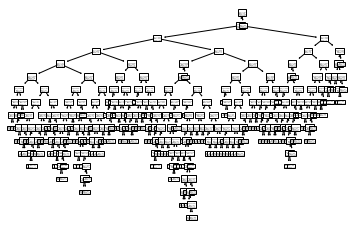

In [40]:
tree.plot_tree(regressor)

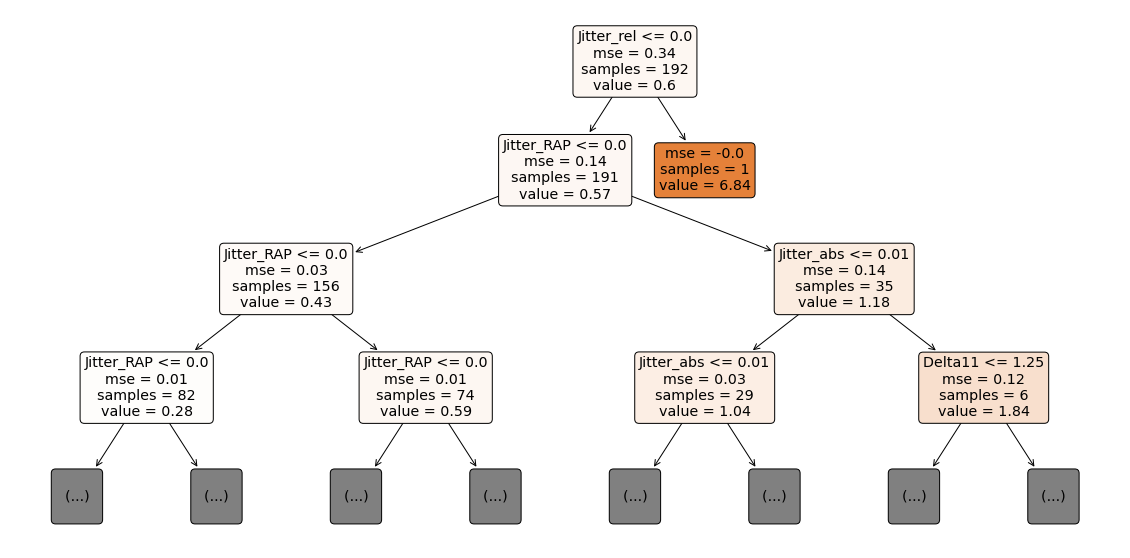

In [41]:
plt.figure(figsize = (20,10))
plot_tree(decision_tree = regressor, feature_names = dataset.columns,
         class_names=["0","1"], max_depth = 3, precision = 2, rounded =True, filled = True)
plt.savefig("one.png")

In [42]:
dataset

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,0,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,0,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,1,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,1,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,78,2,1,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,...,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144
236,78,3,1,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,...,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835
237,79,1,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,...,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409
238,79,2,1,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,...,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353
